# INSIGHT CONTEST 3th - CreeqBoat
## Team 보더콜리🐶 - 안가영🐾 박정균🦴

# Data Load

In [62]:
#!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [63]:
#데이터 정규화
scaler = StandardScaler()
#Q16, Q17, Q18은 카테고리 변수로, 스케일링 제외
exception = ['Q16','Q17','Q18']
#Q13, Q14도 카테고리 변수로, 제외
exception2 = ['Q11','Q13','Q14']
excepts = data[[*exception,*exception2]]
#Scaling 실행
data = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]),columns=data.columns[1:]).drop([*exception,*exception2],axis=1)
#exception 추가
data[[*exception,*exception2]] = excepts
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18,Q11,Q13,Q14
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,1.826135,0.406008,0.137651,0.439300,28,0,1,2,5,1
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1,2,5,1
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-1.418234,0.406008,-1.188421,1.619576,48,1,0,1,5,1
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,-1.418234,1.551545,1.463723,0.439300,40,1,0,1,5,1
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,-0.336778,0.406008,1.463723,0.439300,19,0,0,1,5,1


In [64]:
# Q11 - 여자는 1 남자는 0
data['Q11'] = data['Q11'].apply(lambda x: 1 if x==2 else 0)

# Q14 - 일하는 중이면 1
data.loc[data['Q14'].isin([1,2]),'Q14'] = 1
data.loc[data['Q14'].isin([3,4,5,6,7]),'Q14'] = 0

# Q13 - 동반자가 있으면 1
data.loc[data['Q13'].isin([1,6]),'Q13'] = 1
data.loc[data['Q13'].isin([2,3,4,5]),'Q13'] = 0

data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18,Q11,Q13,Q14
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,1.826135,0.406008,0.137651,0.439300,28,0,1,1,0,1
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1,1,0,1
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-1.418234,0.406008,-1.188421,1.619576,48,1,0,0,0,1
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,-1.418234,1.551545,1.463723,0.439300,40,1,0,0,0,1
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,-0.336778,0.406008,1.463723,0.439300,19,0,0,0,0,1


# Part1

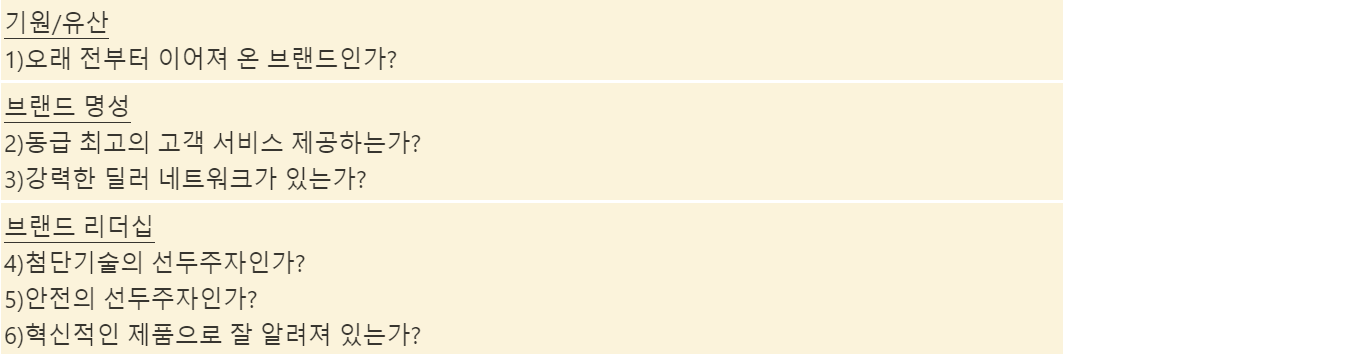

- 설문조사 Q1.1 ~ Q1.9 질문이 의미하는 바가 비슷한 문항끼리 묶고자 함
- Q16와 비슷하게 문항 카테고리가 구분되도록 함

In [65]:
# Q1
Q1 = data.iloc[:,:29]
Q1.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.869481,1.032227,1.340882,1.403761,1.175582,1.325295,1.955336,-0.148794,0.703498,1.326973
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-0.162523,-0.343261,-0.012509,-0.550597,-0.143489,0.229131,1.003057,0.804640,0.703498,-0.041346
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-0.162523,-1.718749,1.340882,0.426582,-0.143489,0.229131,1.955336,-0.148794,-0.314475,-0.041346
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,-0.162523,1.032227,-0.012509,1.403761,-1.462561,1.325295,1.003057,-0.148794,-0.314475,1.326973
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.869481,-0.343261,-0.012509,1.403761,-0.143489,0.229131,1.955336,0.804640,0.703498,-0.041346


## Choose the number of the factors

In [66]:
cov_mat = np.cov(Q1.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.19281114e-01  1.98841790e-01  8.10814788e-02  6.08749730e-02
  -3.13566260e-01 -3.44706948e-01 -6.38994054e-01 -8.36445915e-02
   1.52609733e-01  4.04321314e-01  2.30588486e-02  2.52222402e-02
   2.19367367e-02  3.18194989e-02  1.88539423e-03 -6.47144489e-02
  -1.83600291e-01 -6.15533400e-02 -7.71445782e-02 -4.83661783e-02
   3.35101905e-02  1.24177514e-01  7.30072792e-02  6.77413817e-02
   1.22080887e-01 -1.42177396e-01 -3.31335544e-02  2.89067998e-02
   2.40199660e-02]
 [ 1.31300741e-02 -1.43673136e-01  4.62837887e-01 -3.25580347e-01
  -5.73746812e-03 -1.77216060e-01 -1.47469281e-01  8.74686405e-02
  -2.77158648e-01 -4.88477028e-03  6.17102435e-02 -7.09255586e-02
  -1.67138445e-02  2.97344897e-01  6.96265169e-02  9.24777219e-02
  -6.99704444e-02 -7.60154459e-02  1.35712091e-01  1.14392044e-01
  -2.82602220e-01 -1.69455033e-01  2.89324380e-02 -3.17866207e-01
  -1.38084243e-01  1.81705599e-01 -1.27369490e-01 -7.39883578e-02
  -2.89725847e-01]
 [-2.22658469e-01 -1.689

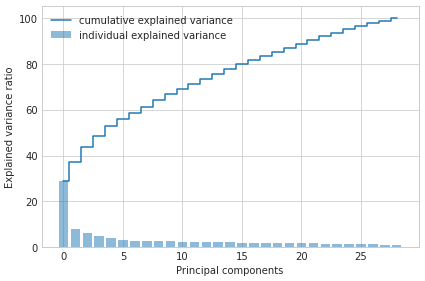

In [67]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q1.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q1.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [68]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


## FactorAnalysis

#### n=5일때 요인분석 진행

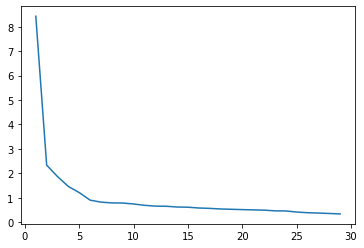

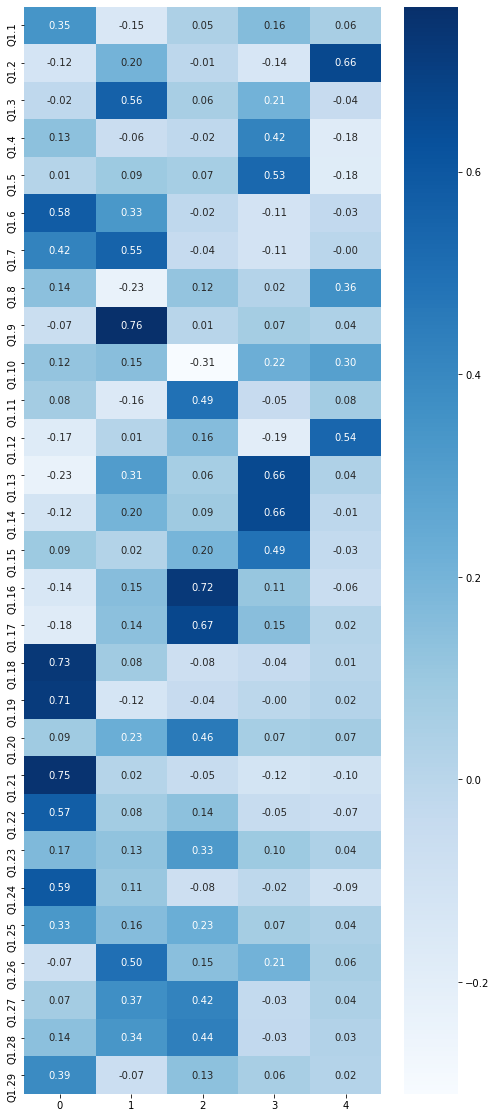

In [69]:
import seaborn as sns

x = Q1.copy()
fa = FactorAnalyzer(5, method="ml", rotation="promax")
fa.fit(x)
efa = pd.DataFrame(fa.loadings_, index=x.columns)
#Eigenvalue Plotting
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)
plt.show()

plt.figure(figsize=(8,20))
sns.heatmap(efa, cmap="Blues", annot=True, fmt='.2f')
plt.show()

5개의 그룹 완성
- 요인적재량(loading) 0.4 미만의 변수 제외

In [70]:
groups = [[] for _ in range(5)]
for i in range(len(efa)):
    if max(efa.iloc[i])>=0.4:
        groups[np.argmax(efa.iloc[i])].append(efa.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

Group 0:
['Q1.6', 'Q1.18', 'Q1.19', 'Q1.21', 'Q1.22', 'Q1.24']
Group 1:
['Q1.3', 'Q1.7', 'Q1.9', 'Q1.26']
Group 2:
['Q1.11', 'Q1.16', 'Q1.17', 'Q1.20', 'Q1.27', 'Q1.28']
Group 3:
['Q1.4', 'Q1.5', 'Q1.13', 'Q1.14', 'Q1.15']
Group 4:
['Q1.2', 'Q1.12']


각 그룹별 특성에 맞추어 임의로 명명

- Group 0 (Active): 보트로 일상에서의 활력을 느끼는 그룹
- Group 1 (Achievement): 보트로 성취감과 지위욕을 충족하는 그룹
- Group 2 (Confidence): 보트와 보트 지식에 대해 자신감과 열정이 있는 그룹
- Group 3 (Tech): 보트를 구매할 때 최신식의 기술을 중요시 여기는 그룹
- Group 4 (Basic): 보트를 구매할 때 저렴한 기본 보트를 선호하는 그룹

In [71]:
new_Q1 = pd.DataFrame(fa.transform(x), columns=['Active','Achievement','Confidence','Tech','Basic'])
new_Q1.head()

,Active,Achievement,Confidence,Tech,Basic
0,1.603504,1.925999,0.588489,2.312300,-1.403016
1,0.183254,1.290527,-0.175544,0.822054,-0.744389
2,-0.412128,1.290524,0.255103,1.639500,-1.675826
3,0.722554,0.272728,0.468732,1.946347,-0.437991
4,0.666488,1.556704,1.426527,1.788969,-0.697391


### 가공된 Q1 데이터와 기존 데이터 연결

In [72]:
data = pd.concat([new_Q1, data.iloc[:,29:]],axis=1)
data.head()

,Active,Achievement,Confidence,Tech,Basic,Q2,Q2.Cluster,Q3,Q4,Q5,...,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18,Q11,Q13,Q14
0,1.603504,1.925999,0.588489,2.312300,-1.403016,0.125422,0.587613,-0.215617,3.074166,1.780707,...,1.826135,0.406008,0.137651,0.439300,28,0,1,1,0,1
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.125422,0.587613,-0.215617,-0.397732,3.075726,...,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1,1,0,1
2,-0.412128,1.290524,0.255103,1.639500,-1.675826,0.125422,0.587613,1.204830,0.470243,3.075726,...,-1.418234,0.406008,-1.188421,1.619576,48,1,0,0,0,1
3,0.722554,0.272728,0.468732,1.946347,-0.437991,0.125422,0.587613,-0.215617,0.904230,3.075726,...,-1.418234,1.551545,1.463723,0.439300,40,1,0,0,0,1
4,0.666488,1.556704,1.426527,1.788969,-0.697391,0.125422,0.587613,-0.215617,0.470243,3.075726,...,-0.336778,0.406008,1.463723,0.439300,19,0,0,0,0,1


# Part1+

## Q2-Q10

Q2~Q10에 대해서도 동일한 방식으로 요인분석 진행 및 차원 축소

### Q2-Q10 분리

In [73]:
# Q2 ~ Q10
Q2 = data.iloc[:,5:22]
# Q3는 예외적인 성격을 띠어 제외. 추후 병합됨.
Q2.drop('Q3', axis=1, inplace=True)
Q2.head()

,Q2,Q2.Cluster,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,0.125422,0.587613,3.074166,1.780707,6.293197,-0.208793,-0.898219,-0.709451,-0.768566,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,1.218726
1,0.125422,0.587613,-0.397732,3.075726,0.203237,-0.208793,0.892490,0.175161,1.510797,-0.387288,-0.460576,0.557970,0.293257,1.544071,0.471260,-0.368565
2,0.125422,0.587613,0.470243,3.075726,-0.171529,-1.105488,-1.793573,0.175161,0.371116,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,-0.368565
3,0.125422,0.587613,0.904230,3.075726,-0.077838,0.687902,-0.002865,-0.709451,0.371116,-0.387288,0.342648,-1.329666,0.293257,-0.165621,-1.434784,-0.368565
4,0.125422,0.587613,0.470243,3.075726,0.109546,-1.105488,-0.002865,-0.709451,-0.768566,-0.387288,-0.460576,-0.385848,-0.747009,-0.165621,-0.481762,-0.368565


### Q2-Q10의 축소 차원 수 결정

#### Eigenvalue 확인

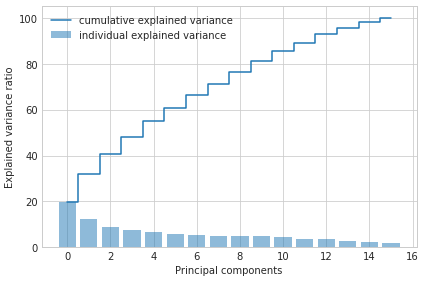

In [74]:
cov_mat = np.cov(Q2.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q2.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q2.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [75]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


#### n=5일때 그룹 확인

Group 0:
['Q2', 'Q2.Cluster']
Group 1:
['Q7.4', 'Q9.3', 'Q9.5']
Group 2:
['Q9.4']
Group 3:
['Q7.2', 'Q7.3']
Group 4:
['Q9.1']


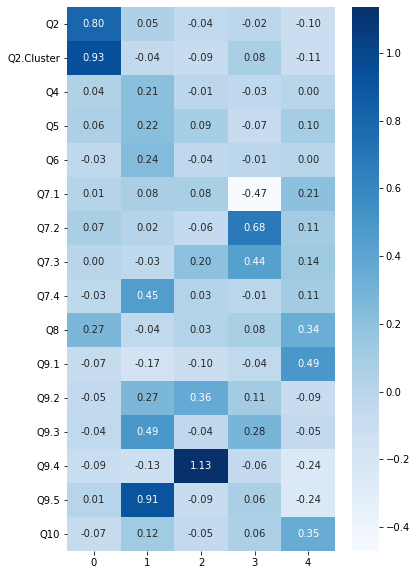

In [76]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
fa.fit(Q2[items])

efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(5)]
for i in range(len(efa_result)):
    if max(efa_result.iloc[i])>=0.4:
        groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

#### n=6일때 그룹 확인

Group 0:
['Q7.4', 'Q9.3', 'Q9.5']
Group 1:
['Q2', 'Q2.Cluster']
Group 2:
['Q9.2', 'Q9.4']
Group 3:
['Q7.2']
Group 4:
['Q9.1']
Group 5:
['Q4', 'Q6']


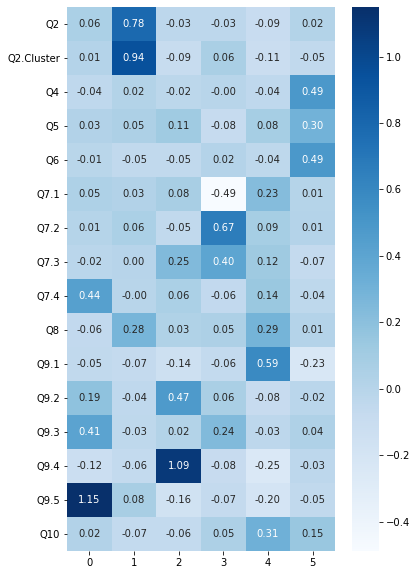

In [77]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
fa.fit(Q2[items])

efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(6)]
for i in range(len(efa_result)):
    if max(efa_result.iloc[i])>=0.4:
        groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

각 그룹별 특성에 맞추어 임의로 명명

- Group 0 (Entertaining): 보트로 친구들과 크루징, 오락을 즐기는 그룹
- Group 1 (Water_Activity): 보트로 수상 활동을 즐기는 그룹
- Group 2 (Own): 응답자의 보트 소유 여부에 따른 그룹
- Group 3 (With_Family): 보트로 가족과 활동하는 그룹
- Group 4 (Fishing_Alone): 보트로 혼자 낚시하는 그룹
- Group 5 (Character): 보트 특성에 따른 구입 의향에 대한 그룹

### Q2-Q10 차원축소 실행

In [78]:
# Q2-Q10 축소
new_Q2 = pd.DataFrame(fa.transform(Q2), columns=['Entertaining','Water_Activity','Own','With_Family','Fishing_Alone','Character'])
new_Q2.head()

,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,Character
0,0.695587,0.646743,0.808927,-0.263064,0.467019,3.418601
1,0.729947,0.575782,1.468835,0.589599,0.320799,0.769380
2,0.500457,0.565393,0.712958,-0.333504,0.093021,0.795421
3,-1.140031,0.586113,-0.215491,-0.616949,0.609455,0.551950
4,-0.518371,0.424147,-0.264415,-0.131742,-0.342173,0.536142


### 기존 데이터와 병합

In [79]:
# Q2-Q10 차원축소와 결합
_data = pd.concat([data.iloc[:,:5], new_Q2],axis=1)
_data = pd.concat([_data, data.iloc[:,22:]], axis=1)
# Q3 병합
_data['Q3'] = data['Q3']
data = _data
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18,Q11,Q13,Q14,Q3
0,1.603504,1.925999,0.588489,2.312300,-1.403016,0.695587,0.646743,0.808927,-0.263064,0.467019,...,0.406008,0.137651,0.439300,28,0,1,1,0,1,-0.215617
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729947,0.575782,1.468835,0.589599,0.320799,...,-0.739529,-1.188421,-0.740977,28,1,1,1,0,1,-0.215617
2,-0.412128,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565393,0.712958,-0.333504,0.093021,...,0.406008,-1.188421,1.619576,48,1,0,0,0,1,1.204830
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140031,0.586113,-0.215491,-0.616949,0.609455,...,1.551545,1.463723,0.439300,40,1,0,0,0,1,-0.215617
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518371,0.424147,-0.264415,-0.131742,-0.342173,...,0.406008,1.463723,0.439300,19,0,0,0,0,1,-0.215617


## Q16 

### Q16 분리

In [80]:
Q16 = data.iloc[:,-34:-7]
Q16[exception] = data[exception]
Q16.head()

,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,Q16.10,...,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18
0,-0.639963,0.509553,0.355449,-0.950890,0.363516,0.222594,0.114242,0.119318,0.112943,0.199366,...,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,28,0,1
1,-0.639963,-0.649196,0.355449,-0.950890,-0.874462,-1.014870,0.114242,0.119318,1.383774,0.199366,...,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1
2,0.331551,0.509553,-0.902259,0.306681,-0.874462,1.460058,1.355030,0.119318,1.383774,1.390056,...,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,48,1,0
3,0.331551,0.509553,0.355449,0.306681,1.601494,0.222594,1.355030,0.119318,1.383774,1.390056,...,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,40,1,0
4,1.303066,1.668301,1.613157,1.564253,1.601494,0.222594,-3.608120,1.410248,1.383774,0.199366,...,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,19,0,0


### 기업별 mean 계산

In [81]:
Q16 = Q16.groupby('Q16').mean().reset_index().drop(['Q17','Q18'],axis=1)
Q16.head()

,Q16,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
0,1,0.061280,0.161057,-0.278133,0.013563,-0.241511,-0.158880,-0.184293,-0.084513,0.084277,...,-0.140609,0.118214,-0.088436,-0.076829,0.087264,0.101441,-0.157890,-0.283037,-0.061758,-0.146402
1,2,-0.478044,-0.456071,-1.111877,-0.322105,-0.255473,-0.396138,-0.506151,-0.741302,-0.946084,...,-0.064107,-0.518003,-0.195991,-0.556666,-0.133638,-0.221847,0.023708,0.215085,-0.304373,0.045874
2,3,0.036822,-0.111050,-0.073208,0.174801,-0.030597,-0.069392,-0.113468,0.128988,0.098664,...,-0.061674,0.008529,0.101752,0.220778,0.066508,0.095782,-0.028947,-0.001580,0.003554,-0.011593
3,4,-0.622299,-0.333173,-0.056165,-0.287807,-0.019132,-0.024899,-0.088796,-0.044982,-0.118118,...,-0.083787,-0.094010,-0.242892,0.237247,-0.356565,-0.087952,0.272770,-0.406282,-0.079342,-0.204488
4,5,0.124940,0.242149,0.031063,0.084757,-0.062214,0.065811,0.080556,0.253668,-0.030817,...,0.246417,0.172390,0.102181,-0.030799,0.091419,0.009258,0.186823,0.146837,0.119650,-0.068059


eigenvalue 1보다 큰 성분의 개수 1


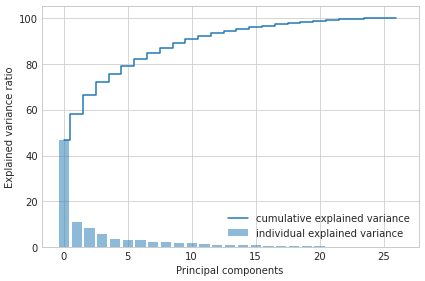

In [82]:
cov_mat = np.cov(Q16.iloc[:,1:].T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(Q16.columns)-1), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q16.columns)-1), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

print(f'eigenvalue 1보다 큰 성분의 개수 {len([val for val in eig_vals if val>1])}')

임의로 개수 결정

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

df_pca = pca.fit_transform(Q16.iloc[:,1:])

Q16_reducted = pd.concat([Q16[['Q16']],pd.DataFrame(df_pca, columns=['equi1','equi2','equi3','equi4'])],axis=1)
Q16_reducted.head()

,Q16,equi1,equi2,equi3,equi4
0,1,0.624837,0.299360,0.176775,0.538344
1,2,1.434434,-0.142963,-1.098078,-0.658811
2,3,-0.157446,-0.320290,0.088960,0.140804
3,4,0.632833,-0.401380,-0.161733,-0.428492
4,5,-0.088936,0.502584,0.223715,0.260171


In [84]:
temp = data[exception].merge(Q16_reducted)
temp.head()

,Q16,Q17,Q18,equi1,equi2,equi3,equi4
0,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
1,28,1,1,-0.719049,-0.14722,-0.026881,-0.124621
2,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
3,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
4,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621


In [85]:
temp['Q17'] = temp['Q17'].apply(lambda x: -1 if x==0 else 1)
temp['Q18'] = temp['Q18'].apply(lambda x: -1 if x==0 else 1)
temp['preference'] = temp.apply(lambda x: x['Q17']+x['Q18'], axis=1)
temp['preference'] = scaler.fit_transform(temp[['preference']])

for idx in ['equi'+str(i) for i in range(1,5)]:
    temp[idx] *= temp['preference']
temp.head()

,Q16,Q17,Q18,equi1,equi2,equi3,equi4,preference
0,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
1,28,1,1,-1.152395,-0.235945,-0.043081,-0.199726,1.602667
2,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
3,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
4,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022


### 기존 데이터와 병합

In [86]:
data.drop(['Q16.'+str(i) for i in range(1,28)], axis=1, inplace=True)
data.drop(exception, axis=1, inplace=True)
data = pd.concat([data, temp[['equi1','equi2','equi3','equi4']]],axis=1)
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q12,Q15,Q11,Q13,Q14,Q3,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403016,0.695587,0.646743,0.808927,-0.263064,0.467019,...,1.200646,-0.474762,1,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729947,0.575782,1.468835,0.589599,0.320799,...,0.770073,-1.346503,1,0,1,-0.215617,-1.152395,-0.235945,-0.043081,-0.199726
2,-0.412128,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565393,0.712958,-0.333504,0.093021,...,0.124213,-1.346503,0,0,1,1.204830,-0.164678,-0.033717,-0.006156,-0.028541
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140031,0.586113,-0.215491,-0.616949,0.609455,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518371,0.424147,-0.264415,-0.131742,-0.342173,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541


## 최종 정제된 데이터

In [87]:
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q12,Q15,Q11,Q13,Q14,Q3,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403016,0.695587,0.646743,0.808927,-0.263064,0.467019,...,1.200646,-0.474762,1,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729947,0.575782,1.468835,0.589599,0.320799,...,0.770073,-1.346503,1,0,1,-0.215617,-1.152395,-0.235945,-0.043081,-0.199726
2,-0.412128,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565393,0.712958,-0.333504,0.093021,...,0.124213,-1.346503,0,0,1,1.204830,-0.164678,-0.033717,-0.006156,-0.028541
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140031,0.586113,-0.215491,-0.616949,0.609455,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518371,0.424147,-0.264415,-0.131742,-0.342173,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Active          2813 non-null   float64
 1   Achievement     2813 non-null   float64
 2   Confidence      2813 non-null   float64
 3   Tech            2813 non-null   float64
 4   Basic           2813 non-null   float64
 5   Entertaining    2813 non-null   float64
 6   Water_Activity  2813 non-null   float64
 7   Own             2813 non-null   float64
 8   With_Family     2813 non-null   float64
 9   Fishing_Alone   2813 non-null   float64
 10  Character       2813 non-null   float64
 11  Q12             2813 non-null   float64
 12  Q15             2813 non-null   float64
 13  Q11             2813 non-null   int64  
 14  Q13             2813 non-null   int64  
 15  Q14             2813 non-null   int64  
 16  Q3              2813 non-null   float64
 17  equi1           2813 non-null   f

- 82개 columns에서 20개로 축소!

# Part2

## 최종 차원축소

### 데이터 체크

In [91]:
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q12,Q15,Q11,Q13,Q14,Q3,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403016,0.695587,0.646743,0.808927,-0.263064,0.467019,...,1.200646,-0.474762,1,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729947,0.575782,1.468835,0.589599,0.320799,...,0.770073,-1.346503,1,0,1,-0.215617,-1.152395,-0.235945,-0.043081,-0.199726
2,-0.412128,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565393,0.712958,-0.333504,0.093021,...,0.124213,-1.346503,0,0,1,1.204830,-0.164678,-0.033717,-0.006156,-0.028541
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140031,0.586113,-0.215491,-0.616949,0.609455,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518371,0.424147,-0.264415,-0.131742,-0.342173,...,-0.091074,-1.346503,0,0,1,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541


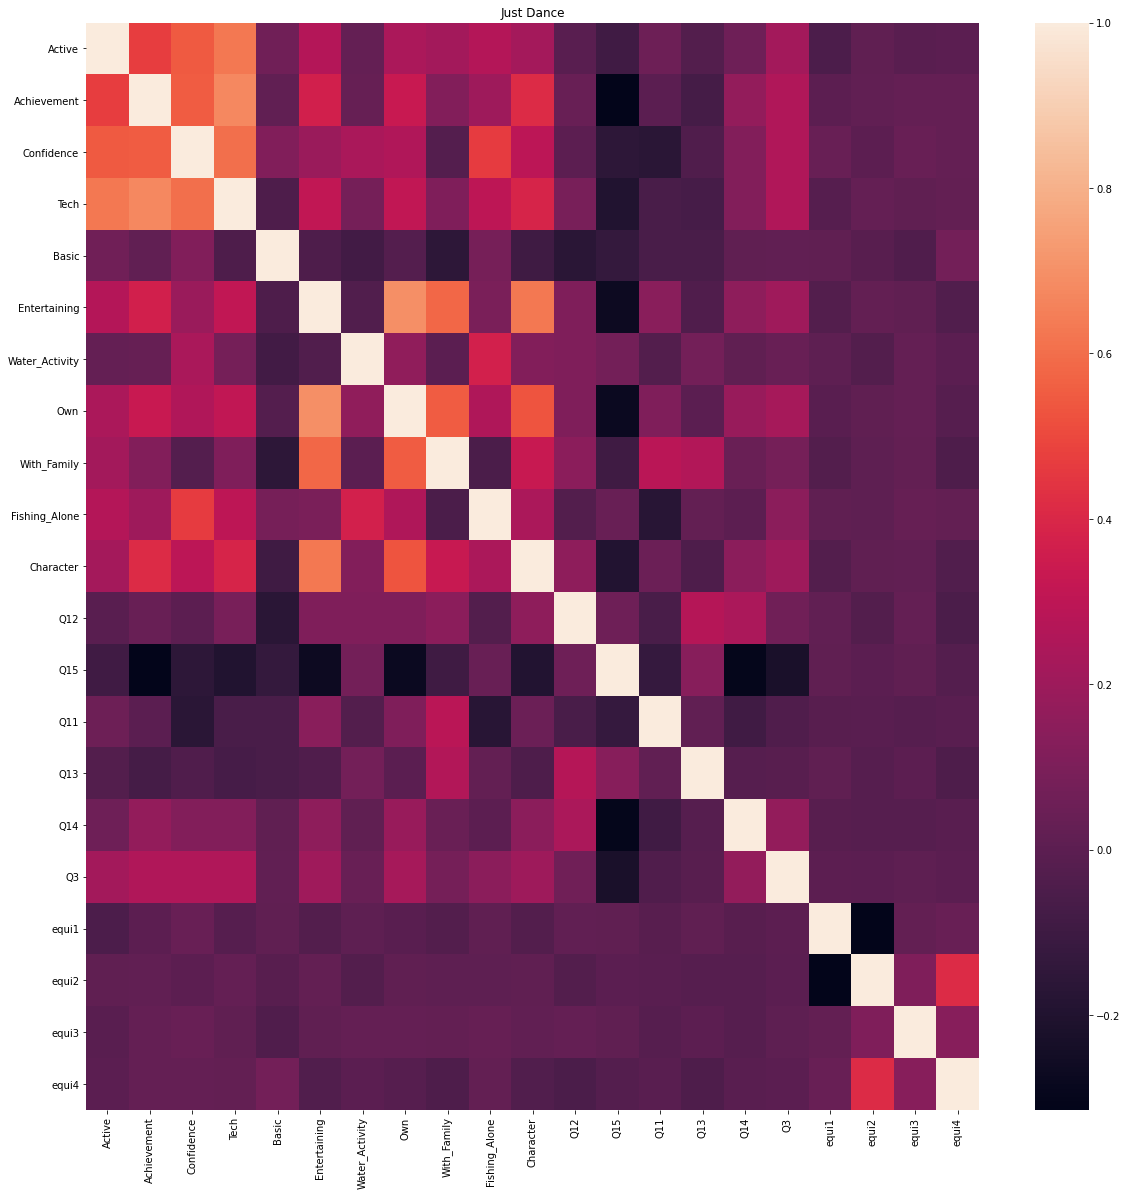

In [90]:
plt.figure(figsize=(20,20))
plt.title('Just Dance')
sns.heatmap(data.corr())
plt.show()

### 요인분석

#### n=6일때 그룹 확인

Group 0:
['Active', 'Achievement', 'Confidence', 'Tech']
Group 1:
['Entertaining', 'Own', 'Character']
Group 2:
['With_Family']
Group 3:
['Water_Activity', 'Fishing_Alone']


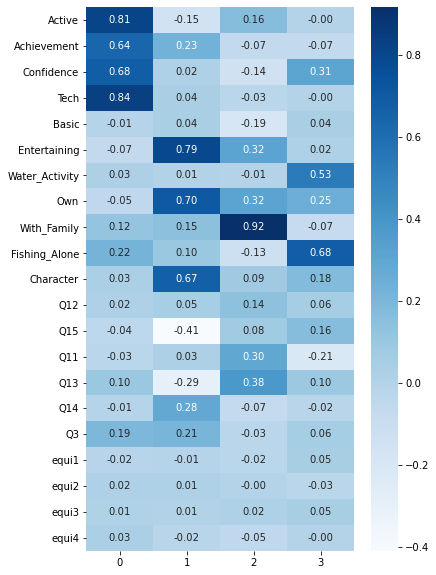

In [97]:
fa = FactorAnalyzer(n_factors=4, method="ml", rotation="promax")
fa.fit(data)

efa_result= pd.DataFrame(fa.loadings_, index=data.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(4)]
for i in range(len(efa_result)):
    if max(efa_result.iloc[i])>=0.4:
        groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

### 차원축소 실행

In [98]:
result = pd.DataFrame(fa.transform(data), columns=['X','Y','Z','W'])
result.head()

,X,Y,Z,W
0,2.140749,2.144766,-0.830238,0.006148
1,0.757192,1.416774,0.423213,-0.112324
2,1.102235,1.386525,-0.821826,-0.271776
3,1.260941,0.104998,-1.072653,0.258592
4,1.729012,0.579419,-0.694085,-0.530467


# Part3 - Clustering

In [108]:
_result = result.copy()
meds = {}
for key in ['X','Y','Z','W']:
    meds[key] = _result[key].median()

In [109]:
for key in ['X','Y','Z','W']:
    _result[key] = _result[key].apply(lambda x: 1 if x>meds[key] else 0)
_result.head()

,X,Y,Z,W
0,1,1,0,0
1,1,1,1,0
2,1,1,0,0
3,1,1,0,1
4,1,1,0,0


In [111]:
model = KMeans(n_clusters=16, random_state=1422)
model.fit(_result)
clusters = model.predict(_result)
score = silhouette_score(_result, clusters)
score

1.0

In [115]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
stdv = np.std(clusters)
print(f"표준편차는           {stdv}")
logged = np.log(stdv)
print(f"거기에 로그 씌운거는 {logged}")
print(f"최종 표준편차 점수는 {sigmoid(logged)}")
print(f'최종 점수는 {score-sigmoid(logged)}')

표준편차는           4.093123066087795
거기에 로그 씌운거는 1.4093082645119006
최종 표준편차 점수는 0.8036568158624655
최종 점수는 0.1963431841375345


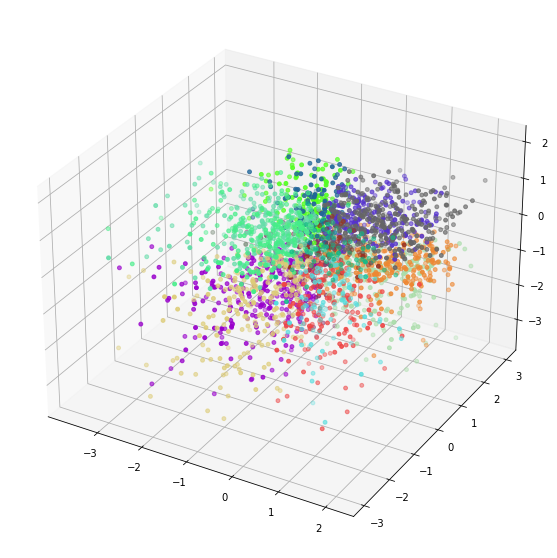

In [152]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
# 3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 추가해줍니다.
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings(action='ignore')

result['cluster'] = model.predict(_result)

# figure 크기 설정
# fig = plt.figure()만 사용해도 됨.
fig = plt.figure(figsize=(10, 10))

# 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔

colors = []
for _ in range(16):
    B = hex(np.random.randint(16))[-1]; G = hex(np.random.randint(16))[-1]; R = hex(np.random.randint(16))[-1]
    colors.append('#'+str(R)+str(G)+str(B))
    
for i in range(len(result['cluster'].unique())):
    target = result.loc[result.cluster==i, ['X','Y','Z']]
    ax.scatter(target['X'],target['Y'],target['Z'], marker='o', s=15, c=colors[i])

plt.show()

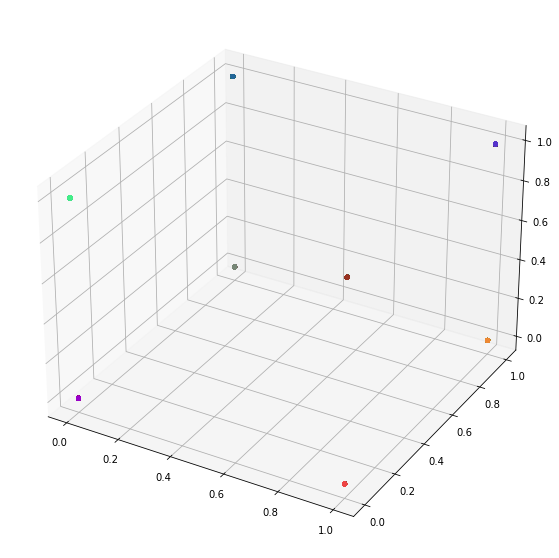

In [154]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
for i in range(len(result['cluster'].unique())):
    target = _result.loc[result.cluster==i, ['X','Y','Z']]
    ax.scatter(target['X'],target['Y'],target['Z'], marker='o', s=15, c=colors[i])

plt.show()

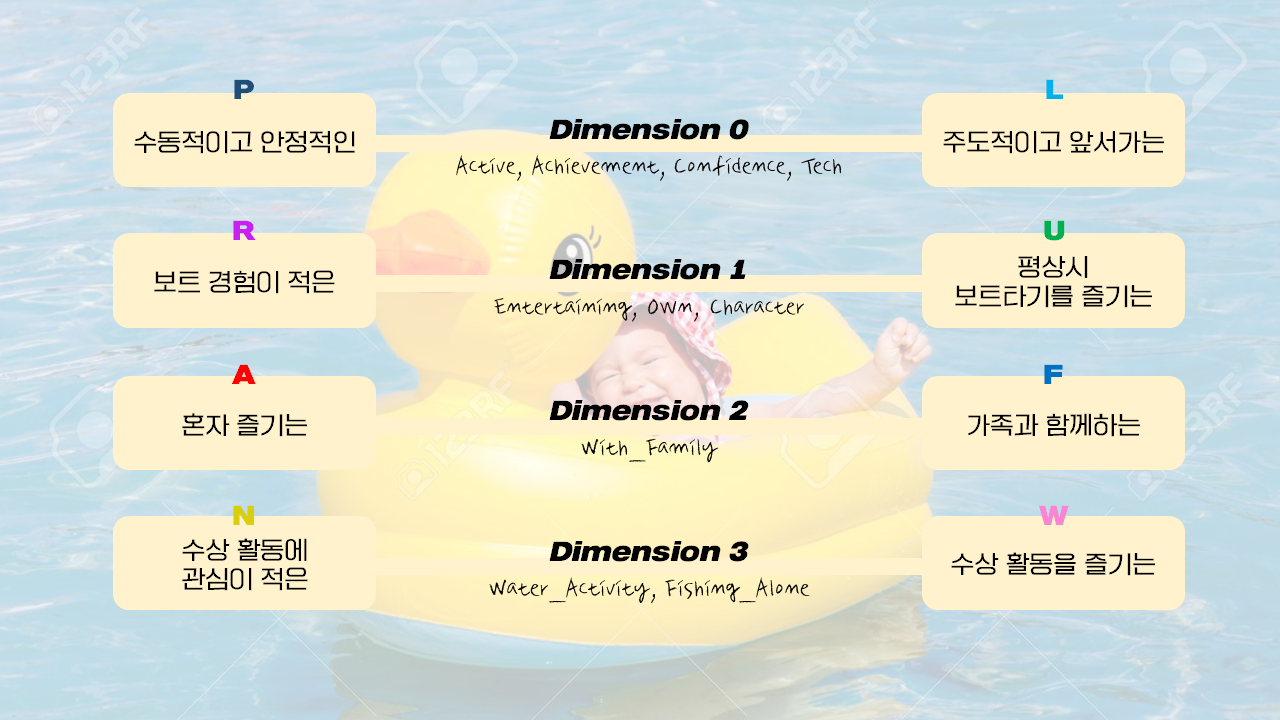

# Part4 - Submission

In [116]:
import pickle

with open('BCLove_submission_test1_model.pkl','wb') as f:
    pickle.dump(model,f)
with open('BCLove_submission_test1_data.pkl','wb') as f:
    pickle.dump(_result,f)